In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/all_opinions.csv', encoding='utf-8')
#print(df.head())
#print(df.columns)
df['case_name'] = df['case_name'].str.upper()
print(df.head())

       author_name    category  per_curiam  \
0  Justice Roberts    majority       False   
1   Justice Thomas  concurring       False   
2   Justice Breyer  dissenting       False   
3    Justice Taney    majority       False   
4   Justice Pitney    majority       False   

                               case_name  date_filed federal_cite_one  \
0  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02     572 U.S. 185   
1  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02     572 U.S. 185   
2  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02     572 U.S. 185   
3                      EX PARTE CRENSHAW  1841-02-18      40 U.S. 119   
4    RICHARDS V. WASHINGTON TERMINAL CO.  1914-05-04     233 U.S. 546   

                                        absolute_url  \
0  https://www.courtlistener.com/opinion/2659301/...   
1  https://www.courtlistener.com/opinion/2659301/...   
2  https://www.courtlistener.com/opinion/2659301/...   
3  https://www.courtlistener.com/opinion/86166/ex...   
4  h

In [3]:
df.isna().sum()

author_name                    0
category                       0
per_curiam                     0
case_name                      0
date_filed                     0
federal_cite_one           16583
absolute_url                   0
cluster                        0
year_filed                     0
scdb_id                     1763
scdb_decision_direction     1768
scdb_votes_majority         1763
scdb_votes_minority         1763
text                           0
dtype: int64

<AxesSubplot:>

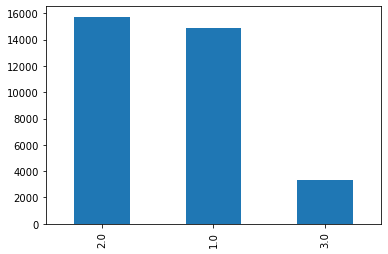

In [4]:
df['scdb_decision_direction'].value_counts().plot(kind='bar')

In [5]:
scdb_df = pd.read_csv('data/scdb_2021_case_based.csv', encoding="ISO 8859-1")
scdb_df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3


<AxesSubplot:>

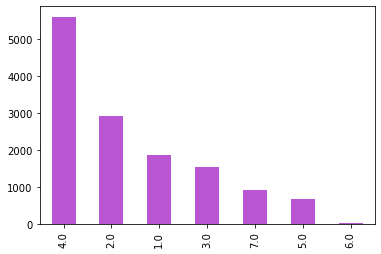

In [6]:
scdb_df['authorityDecision1'].value_counts().plot(kind='bar', color='mediumorchid')

In [7]:
scdb_df = scdb_df.rename({'usCite': 'federal_cite_one', 'majVotes': 'scdb_votes_majority', 'minVotes': 'scdb_votes_minority', 'caseName': 'case_name'}, axis='columns')


In [8]:
df_merged = df.merge(scdb_df[['federal_cite_one', 'case_name']], on='case_name', how='inner')
print(df_merged.isna().sum())

#df5 = df5.merge(df1[['Longitude', 'ID']],on='ID',how="left")
#df5['Longitude_y'] = df5['Longitude_y'].fillna(df5['Longitude_x'])
#df5.drop(["Longitude_x"], inplace=True, axis=1)
#df5.rename(columns={'Longitude_y':'Longitude'},inplace=True)

author_name                0
category                   0
per_curiam                 0
case_name                  0
date_filed                 0
federal_cite_one_x         6
absolute_url               0
cluster                    0
year_filed                 0
scdb_id                    0
scdb_decision_direction    0
scdb_votes_majority        0
scdb_votes_minority        0
text                       0
federal_cite_one_y         0
dtype: int64


In [9]:
df_merged[df_merged['federal_cite_one_x'].isnull()]
df_merged['federal_cite_one_x'] = df_merged['federal_cite_one_y'].fillna(df_merged['federal_cite_one_y'])

In [10]:
print(df_merged.isna().sum())

author_name                0
category                   0
per_curiam                 0
case_name                  0
date_filed                 0
federal_cite_one_x         0
absolute_url               0
cluster                    0
year_filed                 0
scdb_id                    0
scdb_decision_direction    0
scdb_votes_majority        0
scdb_votes_minority        0
text                       0
federal_cite_one_y         0
dtype: int64


In [11]:
df_merged.head(10)

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one_x,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,federal_cite_one_y
0,Justice Black,majority,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,A Michigan circuit judge summarily sent the pe...,333 U.S. 257
1,Justice Rutledge,concurring,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,I join in the Court's opinion and decision. Bu...,333 U.S. 257
2,Justice Jackson,dissenting,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,The principal ground assigned for reversal of ...,333 U.S. 257
3,Justice Vinson,majority,False,EX PARTE COLLETT,1949-05-31,337 U.S. 55,https://www.courtlistener.com/opinion/104671/e...,https://www.courtlistener.com/api/rest/v3/clus...,1949,1948-077,1.0,7.0,2.0,In this case we must decide whether the venue ...,337 U.S. 55
4,Justice Vinson,majority,False,EX PARTE COLLETT,1949-05-31,337 U.S. 55,https://www.courtlistener.com/opinion/104671/e...,https://www.courtlistener.com/api/rest/v3/clus...,1949,1948-077,1.0,7.0,2.0,In this case we must decide whether the venue ...,337 U.S. 55
5,per_curiam,per_curiam,True,IN RE DISBARMENT OF ISSERMAN,1954-10-14,345 U.S. 286,https://www.courtlistener.com/opinion/105240/i...,https://www.courtlistener.com/api/rest/v3/clus...,1954,1954-001,2.0,3.0,3.0,"April 6, 1953, an order was entered disbarring...",345 U.S. 286


In [13]:
df_merged.drop(['federal_cite_one_y'], axis=1, inplace=True)

In [14]:
df_merged.head()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one_x,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
0,Justice Black,majority,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,A Michigan circuit judge summarily sent the pe...
1,Justice Rutledge,concurring,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,I join in the Court's opinion and decision. Bu...
2,Justice Jackson,dissenting,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,The principal ground assigned for reversal of ...
3,Justice Vinson,majority,False,EX PARTE COLLETT,1949-05-31,337 U.S. 55,https://www.courtlistener.com/opinion/104671/e...,https://www.courtlistener.com/api/rest/v3/clus...,1949,1948-077,1.0,7.0,2.0,In this case we must decide whether the venue ...
4,Justice Vinson,majority,False,EX PARTE COLLETT,1949-05-31,337 U.S. 55,https://www.courtlistener.com/opinion/104671/e...,https://www.courtlistener.com/api/rest/v3/clus...,1949,1948-077,1.0,7.0,2.0,In this case we must decide whether the venue ...


In [ ]:
df_merged.to_csv('all_opinions_up_through_2022.csv')

In [ ]:
df.loc[:, ['federal_cite_one']] = scdb_df[['federal_cite_one']]

In [ ]:
df.head(100)

In [ ]:
col = 'case_name'
cols_to_replace = ['federal_cite_one', 'scdb_id', 'scdb_decision_direction', 'scdb_votes_majority', 'scdb_votes_minority']

In [ ]:
df.loc[scdb_df[col].isin(df[col]), cols_to_replace] = scdb_df.loc[scdb_df[col].isin(scdb_df[col]), cols_to_replace].values

#df3.loc[df3[col].isin(df1[col]), cols_to_replace] = df1.loc[df1[col].isin(df3[col]),cols_to_replace].values

In [ ]:
df.isna().sum()

In [ ]:
# Get the sizes of each dataframe before merging them:
print(df.shape)
print(scdb_df.shape)

In [ ]:
print(df.columns)
print(scdb_df.columns)

In [ ]:
df_with_scdb_merged = df.merge(scdb_df, on=['federal_cite_one', 'case_name', 'scdb_votes_majority', 'scdb_votes_minority'], how='left')


In [ ]:
print(df_with_scdb_merged.shape)

In [ ]:
df_with_scdb_merged.isna().sum()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df_with_scdb_merged.head(5))
print(df_with_scdb_merged.shape)